# Proyecto 03 - Series de Tiempo


### Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import scipy as sp
sns.set()

### EDA

In [2]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])
dataset.head()


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


#### ¿Cuáles son las formas de pago más utilizadas?

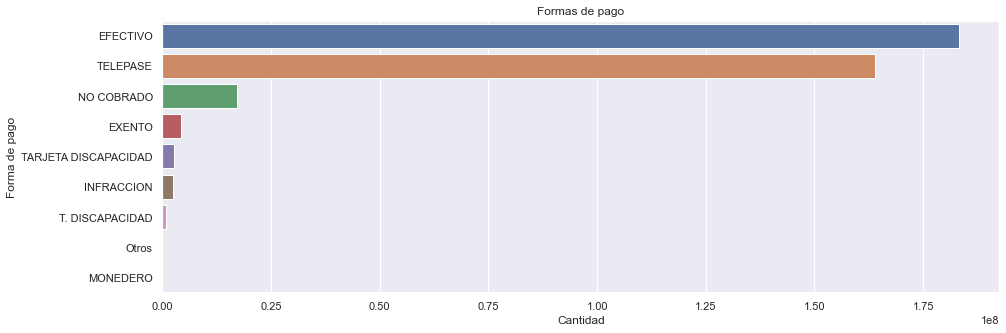

In [11]:
forma_pago = dataset.groupby(['forma_pago']).sum()['cantidad_pasos']
forma_pago = forma_pago.sort_values(ascending=False)
plt.figure(figsize=(15,5))
sns.set()
sns.barplot(y=forma_pago.index,x=forma_pago,ci='None')
plt.title("Formas de pago")
plt.xlabel("Cantidad")
plt.ylabel("Forma de pago")
plt.show()

A partir del gráfico se puede conlcuir que las formas de pago más usadas son el efectivo y el telepase. Además, se observa que hay un número importante de pasos no cobrados, siendo esta tercera en importancia.

#### ¿Cuáles son las estaciones con mayor tráfico?

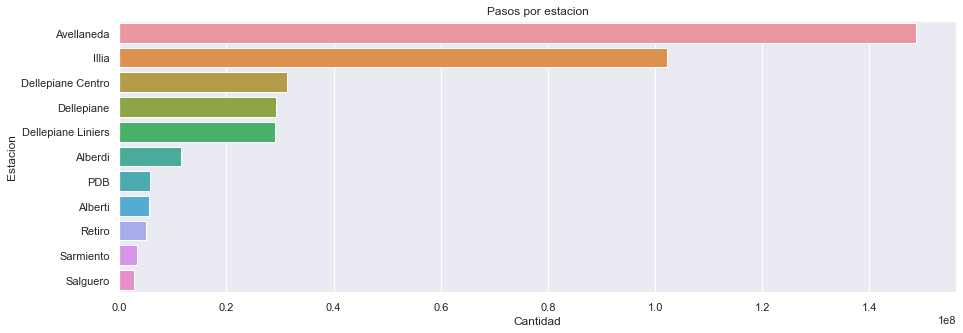

In [12]:
estacion = dataset.groupby(['estacion']).sum()['cantidad_pasos']
estacion = estacion.sort_values(ascending=False)
plt.figure(figsize=(15,5))
sns.set()
sns.barplot(y=estacion.index,x=estacion,ci='None')
plt.title("Pasos por estacion")
plt.xlabel("Cantidad")
plt.ylabel("Estacion")
plt.show()

Las estaciones con mayor cantidad de tráfico son Avellaneda, Illia y Dellepiane.

#### ¿Hacia qué sentido circulan los vehículos?

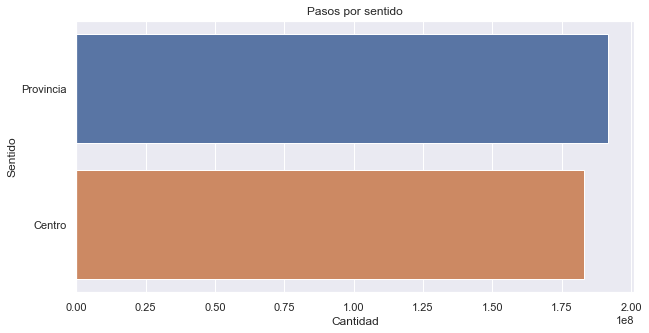

In [13]:
sentido = dataset.groupby(['sentido']).sum()['cantidad_pasos']
sentido = sentido.sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.set()
sns.barplot(y=sentido.index,x=sentido,ci='None')
plt.title("Pasos por sentido")
plt.xlabel("Cantidad")
plt.ylabel("Sentido")
plt.show()

Si bien la diferencia no es grande, hay más circulación con sentido a provincia que con sentido hacia el centro.

####  ¿Cuál es el tipo de vehículo más utilizado? ¿Cómo fue la evolución del tráfico por tipo de vehículo en los 3 años?

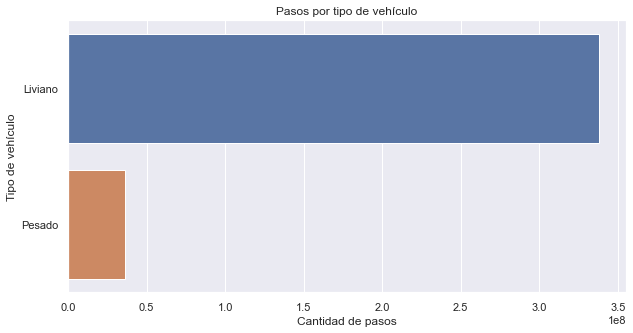

In [14]:
tipo_vehiculo = dataset.groupby(['tipo_vehiculo']).sum()['cantidad_pasos']
tipo_vehiculo = tipo_vehiculo.sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.set()
sns.barplot(y=tipo_vehiculo.index,x=tipo_vehiculo,ci='None')
plt.title("Pasos por tipo de vehículo")
plt.xlabel("Cantidad de pasos")
plt.ylabel("Tipo de vehículo")
plt.show()

Claramente, el gráfico muestra la preferencia por los vehículos livianos

In [15]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

,periodo,hora_inicio,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha2
0,2019,0,Martes,Alberti,Centro,Liviano,NO COBRADO,22,2019-01-01 01:00:00
1,2019,0,Martes,Alberti,Centro,Liviano,TELEPASE,6,2019-01-01 01:00:00
2,2019,0,Martes,Alberti,Provincia,Liviano,NO COBRADO,53,2019-01-01 01:00:00
3,2019,0,Martes,Alberti,Provincia,Liviano,TELEPASE,18,2019-01-01 01:00:00
4,2019,0,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16,2019-01-01 01:00:00


In [16]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,periodo,hora_inicio,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,2019,0,Martes,Alberti,Centro,Liviano,NO COBRADO,22,2019-01-01 01:00:00
1,2019,0,Martes,Alberti,Centro,Liviano,TELEPASE,6,2019-01-01 01:00:00
2,2019,0,Martes,Alberti,Provincia,Liviano,NO COBRADO,53,2019-01-01 01:00:00
3,2019,0,Martes,Alberti,Provincia,Liviano,TELEPASE,18,2019-01-01 01:00:00
4,2019,0,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16,2019-01-01 01:00:00


In [17]:
data_vehiculo = pd.DataFrame(dataset.groupby([pd.Grouper(key='fecha',freq='M'),'tipo_vehiculo'])['cantidad_pasos'].sum())
data_vehiculo.reset_index(inplace=True)
data_vehiculo.head()

,fecha,tipo_vehiculo,cantidad_pasos
0,2017-01-31,Liviano,9115051
1,2017-01-31,Pesado,944247
2,2017-02-28,Liviano,8018376
3,2017-02-28,Pesado,807223
4,2017-03-31,Liviano,9298689


In [18]:
data_pesado = data_vehiculo[data_vehiculo.tipo_vehiculo=='Pesado']
data_liviano = data_vehiculo[data_vehiculo.tipo_vehiculo=='Liviano']

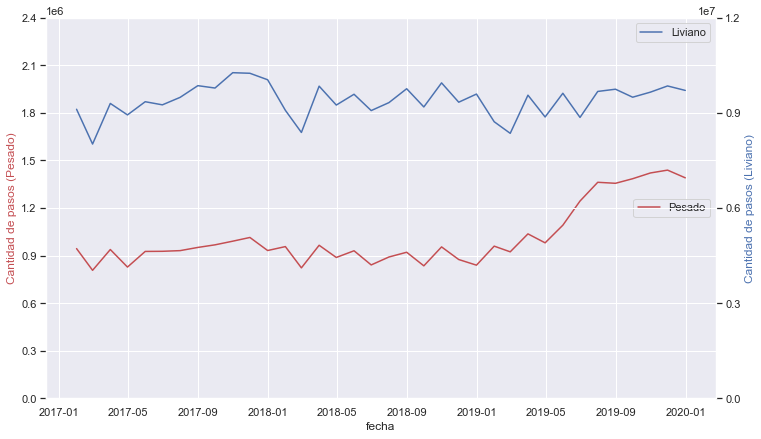

In [19]:
plt.figure(figsize=(12,7))
ax= sns.lineplot(x=data_pesado.fecha,y=data_pesado.cantidad_pasos,ci='None',label='Pesado',color='r')
ax2=ax.twinx()
ax.set_yticks(np.arange(0,2700000,300000))
ax.legend(loc='center right')
ax2= sns.lineplot(x=data_liviano.fecha,y=data_liviano.cantidad_pasos,ci='None',label='Liviano',color='b')
ax.set_ylabel('Cantidad de pasos (Pesado)', color='r')
ax2.set_ylabel('Cantidad de pasos (Liviano)', color='b')
ax2.set_yticks(np.arange(0,13000000,3000000))
ax2.legend(loc='upper right')
plt.show()

En el gráfico anterior, se observa que la conclusión que sacamos con el primer gráfico se mantiene para los 3 años considerados en el dataset. Sin embargo, se observa una tendencia alcista en el uso de vehículos pesados a partir del año 2019. Por otro lado, los vehículos livianos son los que predominan, pero el gráfico no muestra una tendencia para este tipo de vehículos.

#### ¿Las estaciones se comportan de la misma manera?

In [29]:
data_estacion = pd.DataFrame(dataset.groupby([pd.Grouper(key='fecha',freq='M'),'estacion'])['cantidad_pasos'].sum())
data_estacion.reset_index(inplace=True)

In [30]:
data_estacion = data_estacion[(data_estacion.estacion=='Alberdi') | (data_estacion.estacion=='Illia') |(data_estacion.estacion=='Avellaneda')]

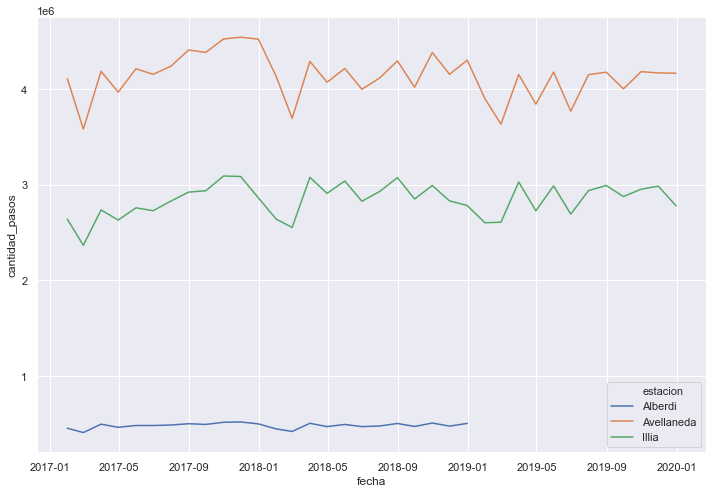

In [31]:
plt.figure(figsize=(12,8))
sns.lineplot(x=data_estacion.fecha, y=data_estacion.cantidad_pasos,hue=data_estacion.estacion)
plt.show()

Realicé una comparación de 3 estaciones (Illia, Avellaneda y Alberdi) para comparar el comportamiento entre ellas.

En el gráfico se observa que las estaciones illia y Avellaneda se comportan de forma similar, pero una más abajo de la otra ya que Avellaneda es la estación con mayor cantidad de tráfico.

Por otro lado, la estación Alberdi tiene una cantidad mucho más baja de tráfico, y solamente posee datos hasta el 2019.

#### ¿Cuáles son los horarios de mayor tráfico?

In [ ]:
data_horarios_mean = dataset.groupby(by='hora_inicio')['cantidad_pasos'].mean()
plt.figure(figsize=(15,6))
sns.barplot(x=data_horarios_mean.index,y=data_horarios_mean,ci='None')
plt.title('Cantidad de pasos por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad de pasos promedio')
plt.show()

Como era de esperarse, los horarios con mayor cantidad de tráfico corresponden al horario laboral, entre las 7 de la mañana y las 8 de la noche. La mayor cantidad de tráfico se encuentra entre las 7 y 6 de las tarde, que coincide con la finalización de la jornada laboral para muchas personas.

### Autopista Illia, medio de pago efectivo

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**

In [ ]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

In [ ]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

In [ ]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [24]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


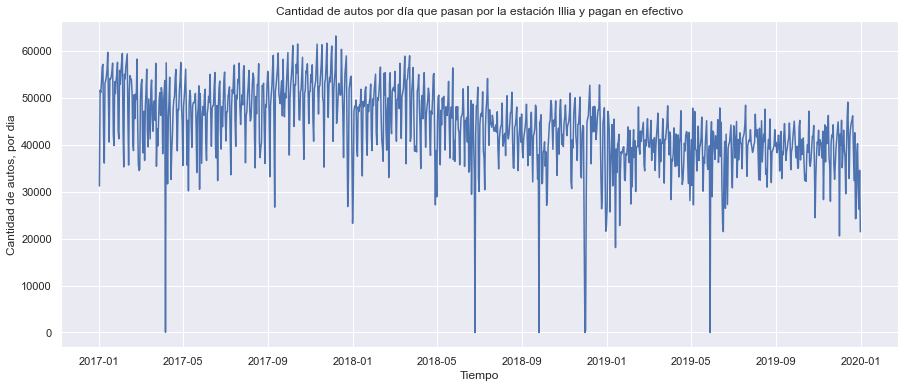

In [25]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.title('Cantidad de autos por día que pasan por la estación Illia y pagan en efectivo')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [26]:
def resample_year (dataset):
    data_year = dataset.resample('D', on='fecha').sum()
    data_year.reset_index(inplace=True)
    data_year['anio']=data_year.fecha.dt.year
    data_year['mes']=data_year.fecha.dt.month
    data_year['dia']=data_year.fecha.dt.day
    data_year['dia_semana']=data_year.fecha.dt.day_name()
    print(data_year.shape)
    return data_year

In [27]:
data_formatted = resample_year(dataset)

(1095, 6)


In [28]:
data_formatted.head()


,fecha,cantidad_pasos,anio,mes,dia,dia_semana
0,2017-01-01,31183,2017,1,1,Sunday
1,2017-01-02,51568,2017,1,2,Monday
2,2017-01-03,51093,2017,1,3,Tuesday
3,2017-01-04,53332,2017,1,4,Wednesday
4,2017-01-05,56486,2017,1,5,Thursday


In [29]:
data_formatted.describe()

,cantidad_pasos,anio,mes,dia
count,1095.000000,1095.00000,1095.000000,1095.000000
mean,43712.859361,2018.00000,6.526027,15.720548
std,8192.736927,0.81687,3.449427,8.800266
min,0.000000,2017.00000,1.000000,1.000000
25%,39061.500000,2017.00000,4.000000,8.000000
50%,43761.000000,2018.00000,7.000000,16.000000
75%,49498.000000,2019.00000,10.000000,23.000000
max,63127.000000,2019.00000,12.000000,31.000000


#### ¿En los últimos años, se mantuvo constante la cantidad de tráfico por la autopista Illia?

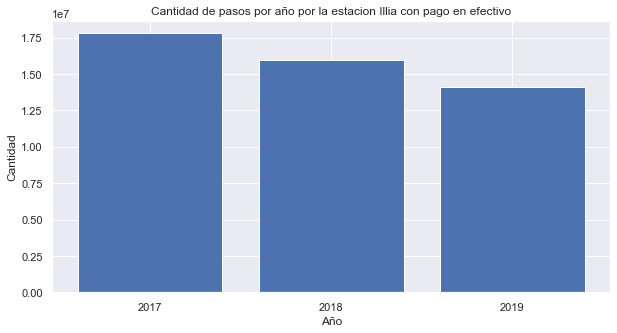

In [30]:
year = data_formatted.groupby(['anio']).sum()['cantidad_pasos']
year=pd.DataFrame(year)
year.reset_index(inplace=True)
year.anio = year.anio.astype('category')
plt.figure(figsize=(10,5))
plt.bar(x= year.anio,height=year.cantidad_pasos)
plt.title('Cantidad de pasos por año por la estacion Illia con pago en efectivo')
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.xticks(np.arange(2017,2020,1))
plt.show()

Se observa una disminución del tráfico a través de la autopista illia del año 2017 al 2019.

#### ¿Varía la cantidad de tráfico en la autopista illia con los meses del año?

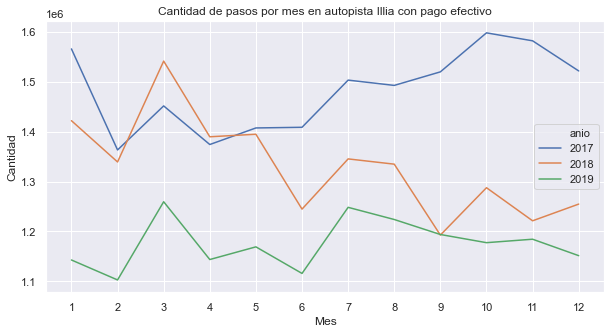

In [31]:
month = data_formatted.groupby(['mes','anio']).sum()['cantidad_pasos']
month=pd.DataFrame(month)
month.reset_index(inplace=True)
month.anio = month.anio.astype('category')
plt.figure(figsize=(10,5))
sns.lineplot(x= month.mes,y=month.cantidad_pasos, hue=month.anio,data=month)
plt.title('Cantidad de pasos por mes en autopista Illia con pago efectivo')
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.xticks(np.arange(1,13,1))
plt.show()

Como se había visto más arriba, la cantidad de tráfico viene bajando del 2017 al 2019. En cuanto a los meses, para 2018 y 2019 se observan picos en el mes de Marzo, y después el tráfico tiende a caer en los siguientes meses del año. Sin embargo, esto no fue así en 2017, donde el pico de tráfico se dio en el mes de Octubre.

#### ¿Cómo afecta el día de la semana al tráfico por la autopista?

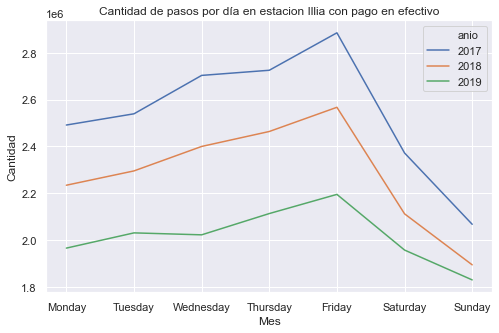

In [32]:
day = data_formatted.groupby(['dia_semana','anio']).sum()['cantidad_pasos']
day = pd.DataFrame(day)
day.reset_index(inplace=True)
# Para ordenar los días empezando por Lunes y terminando el Domingo
sorter = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
sorter_index = dict(zip(sorter,range(len(sorter))))
day['number'] = day.dia_semana
day['number'] = day['number'].map(sorter_index)
day=day.sort_values('number',ascending=True)
day.anio = day.anio.astype('category')
plt.figure(figsize=(8,5))
sns.lineplot(x= day.dia_semana,y=day.cantidad_pasos,hue=day.anio,sort=False)
plt.title('Cantidad de pasos por día en estacion Illia con pago en efectivo')
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.show()

Tal como esperábamos, a partir del Viernes, que empieza el finde semana, el tráfico disminuye en los 3 años considerados. Además, se observa que el tráfico crece de Lunes a Viernes, donde alcanza un pico, y vuelve a caer hasta el Domingo. Esta tendencia se observa en 2017, 2018 y 2019.

### Valores faltantes

In [33]:
diario.reset_index(inplace=True)
diario.isna().sum()

fecha             0
cantidad_pasos    0
dtype: int64

Todas las fechas tiene una cantidad de pasos.

Ahora voy a averiguar si están faltando fechas en el dataset

In [34]:
print(diario)
print(diario.columns)
print(diario.shape)
print(diario.fecha)

          fecha  cantidad_pasos
0    2017-01-01           31183
1    2017-01-02           51568
2    2017-01-03           51093
3    2017-01-04           53332
4    2017-01-05           56486
...         ...             ...
1090 2019-12-27           40182
1091 2019-12-28           30681
1092 2019-12-29           26259
1093 2019-12-30           34523
1094 2019-12-31           21447

[1095 rows x 2 columns]
Index(['fecha', 'cantidad_pasos'], dtype='object')
(1095, 2)
0      2017-01-01
1      2017-01-02
2      2017-01-03
3      2017-01-04
4      2017-01-05
          ...    
1090   2019-12-27
1091   2019-12-28
1092   2019-12-29
1093   2019-12-30
1094   2019-12-31
Name: fecha, Length: 1095, dtype: datetime64[ns]


In [35]:
date_check = diario.fecha.diff()
date_check.value_counts()

1 days    1094
Name: fecha, dtype: int64

Todos los días están presentes en la serie de tiempo.

In [36]:
diario.describe()

,cantidad_pasos
count,1095.000000
mean,43712.859361
std,8192.736927
min,0.000000
25%,39061.500000
50%,43761.000000
75%,49498.000000
max,63127.000000


In [37]:
diario.cantidad_pasos.value_counts()

0        4
42370    2
35383    2
45216    2
37172    2
        ..
52553    1
46408    1
44357    1
52548    1
57344    1
Name: cantidad_pasos, Length: 1071, dtype: int64

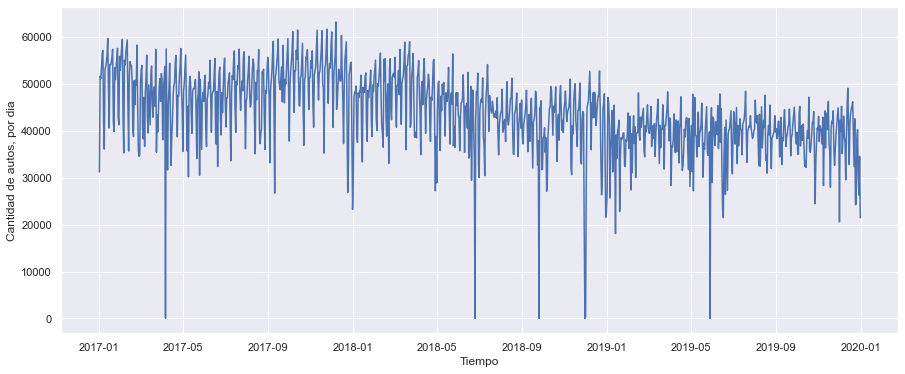

In [38]:
plt.figure(figsize = (15,6))
plt.plot(diario.fecha, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Observando lo anterior, se puede concluir que los valores cercanos a 0 son outliers, y por lo tanto los voy a eliminar. A Partir de la observación del gráfico, primero voy a eliminar la cantidad de pasos menores a 5000

<ipython-input-39-6c92ff50caa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diario.cantidad_pasos[diario.cantidad_pasos<5000] =np.nan


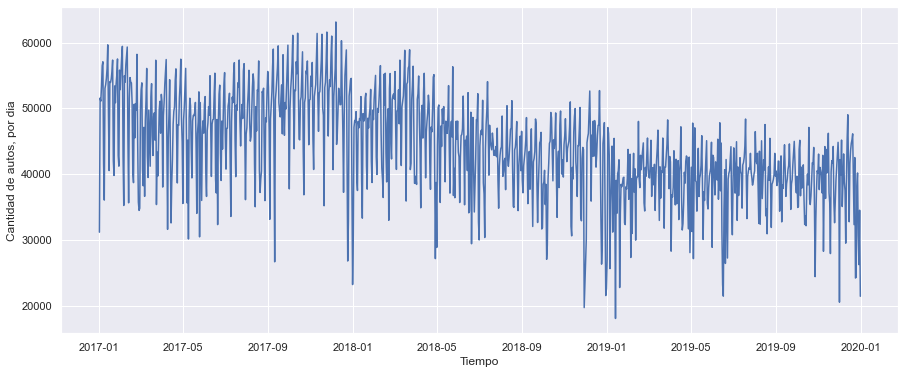

In [39]:
diario.cantidad_pasos[diario.cantidad_pasos<5000] =np.nan
diario=diario.interpolate(method='linear')
plt.figure(figsize = (15,6))
plt.plot(diario.fecha, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

Sin embargo, considero que todavía pueden haber outliers dentro de la series, que se podrían eliminar. Por eso como criterio voy a calcular la media movil de la serie, y tomar una franja de +- 2 desvíos estándar. Todos los valores que estén más allá de estos límites los considero outliers.

In [40]:
ventana = int(365/12)
monthly_rolling_mean = diario.cantidad_pasos.rolling(window=ventana, center = True).mean()
monthly_rolling_mean

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1090   NaN
1091   NaN
1092   NaN
1093   NaN
1094   NaN
Name: cantidad_pasos, Length: 1095, dtype: float64

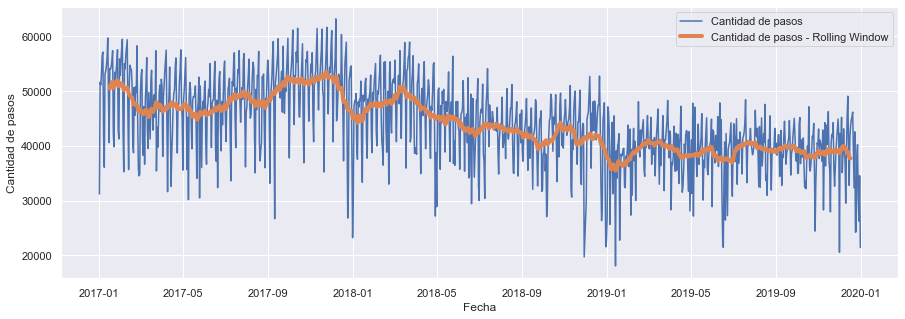

In [41]:
plt.figure(figsize = (15,5))
plt.plot(diario.fecha, diario.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(diario.fecha,monthly_rolling_mean, lw = 4, label = 'Cantidad de pasos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.legend()
plt.show()

Text(0.5, 0, 'Fecha')

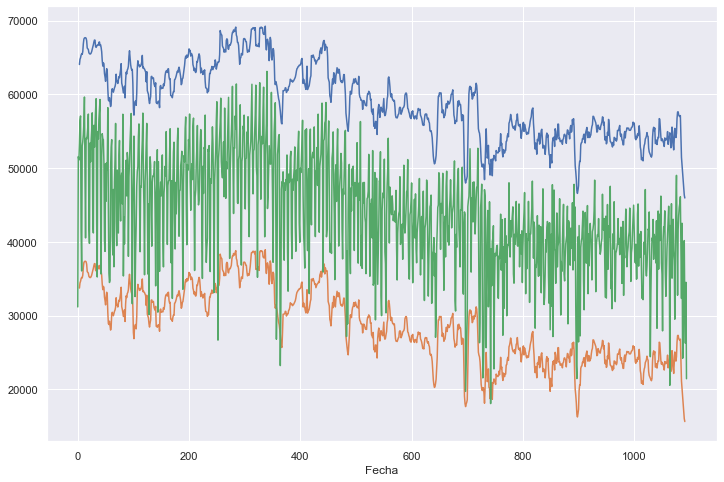

In [42]:
ventana = int(7) # Ventana semanal
weekly_rolling_mean = diario.cantidad_pasos.rolling(window=ventana, center = True).mean()
superior = weekly_rolling_mean + 2*diario.cantidad_pasos.std()
inferior = weekly_rolling_mean - 2*diario.cantidad_pasos.std()
plt.figure(figsize=(12,8))
plt.plot(superior, label = 'Banda superior')
plt.plot(inferior, label='Banda inferior')
plt.plot(diario.index,diario.cantidad_pasos, label='Cantidad de pasos')
plt.xlabel('Fecha')

<ipython-input-43-5c54ab36e341>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diario.cantidad_pasos[i]= np.nan


Text(0.5, 0, 'Fecha')

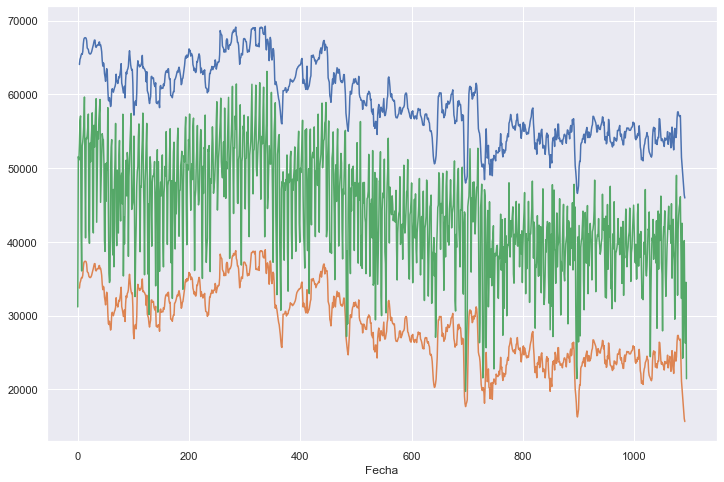

In [43]:
for i in range(1095):
    if (diario.cantidad_pasos[i] > superior[i]) | (diario.cantidad_pasos[i]<inferior[i]):
        diario.cantidad_pasos[i]= np.nan
diario=diario.interpolate(method='linear')
plt.figure(figsize=(12,8))
plt.plot(superior, label = 'Banda superior')
plt.plot(inferior, label='Banda inferior')
plt.plot(diario.index,diario.cantidad_pasos, label='Cantidad de pasos')
plt.xlabel('Fecha')

In [44]:
# chequeo que no hayan valores faltantes
diario.isna().sum()

fecha             0
cantidad_pasos    0
dtype: int64

In [45]:
# Chequeo las diferencias en las fechas
date_check = diario.fecha.diff()
date_check.value_counts()

1 days    1094
Name: fecha, dtype: int64

No falta ningún día.

### Componentes de la serie

Voy a descomponer la serie en sus componentes tendencial, estacional y los residuos.

In [46]:
diario.set_index(keys=diario.fecha,inplace=True)
diario=diario.cantidad_pasos
result = seasonal_decompose(diario, model='additive')


In [47]:
result.trend

fecha
2017-01-01             NaN
2017-01-02             NaN
2017-01-03             NaN
2017-01-04    48904.285714
2017-01-05    49601.714286
                  ...     
2019-12-27    31197.428571
2019-12-28    30801.285714
2019-12-29             NaN
2019-12-30             NaN
2019-12-31             NaN
Name: trend, Length: 1095, dtype: float64

In [48]:
result.seasonal

fecha
2017-01-01   -6138.141005
2017-01-02   -1155.022572
2017-01-03     -11.370037
2017-01-04    1810.615890
2017-01-05    3044.525688
                 ...     
2019-12-27    5065.153893
2019-12-28   -2615.761857
2019-12-29   -6138.141005
2019-12-30   -1155.022572
2019-12-31     -11.370037
Name: seasonal, Length: 1095, dtype: float64

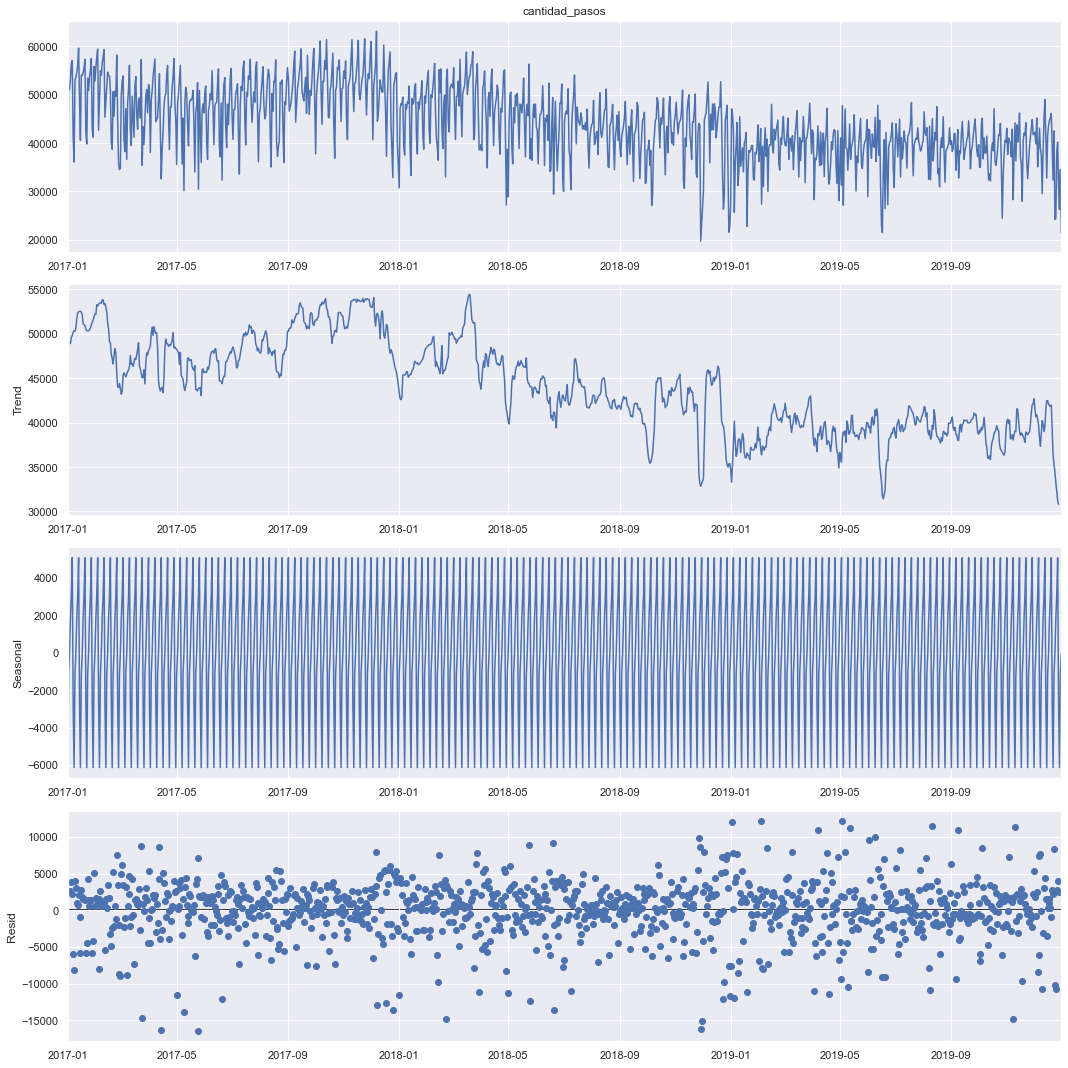

In [49]:
plt.rcParams['figure.figsize'] = [15,15]
result.plot()
plt.show()

C:\Users\Luca Mannori\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Luca Mannori\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


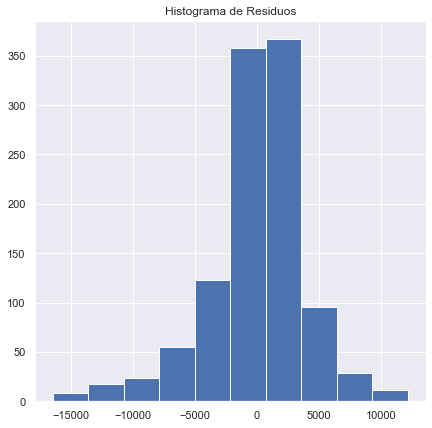

In [50]:
plt.figure(figsize=(7,7))
plt.hist(result.resid)
plt.title("Histograma de Residuos")
plt.show()

### Autocorrelacion

Voy a calcular la autocorrelación de la serie, para entender cuántos valores hacia atrás en el tiempo son significativos para predecir.

In [51]:
nlags =  365*3
autocorr = acf(diario, nlags = nlags)

C:\Users\Luca Mannori\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [52]:
print(autocorr.shape)
print(diario.shape)

(1095,)
(1095,)


Text(0.5, 0, 'lag')

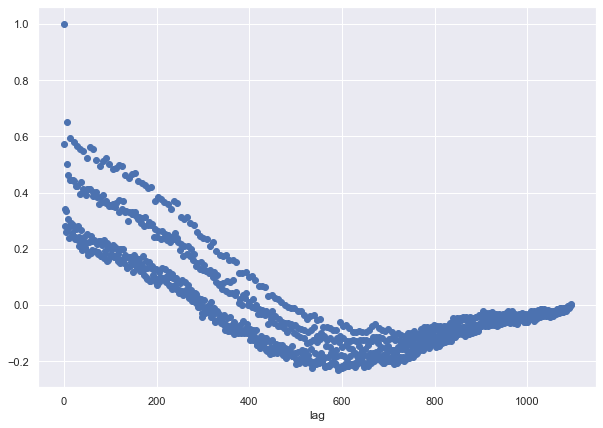

In [53]:
plt.figure(figsize = (10,7))
plt.scatter(np.arange(nlags), autocorr)
plt.xlabel('lag')

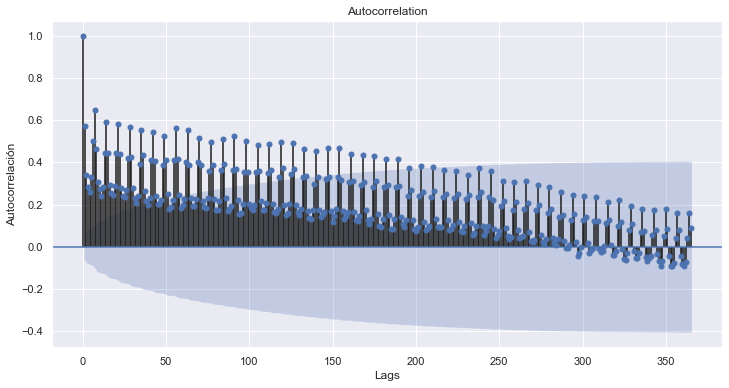

In [54]:
fig=plot_acf(diario, lags = 366-1)
fig.set_size_inches(12, 6)
plt.ylabel('Autocorrelación')
plt.xlabel('Lags')
plt.show()
# Los intervalos de confianza se grafican como un cono. Las correlaciones por fuera de este cono, son estadísticamente significativas.

Observando el gráfico, se puede concluir que hasta aproximadamente 200 valores hacia atrás tienen una correlación significativa. Por lo tanto para predecir voy a usar un loock back de 200.

In [55]:
serie = diario
serie.head()

fecha
2017-01-01    31183.0
2017-01-02    51568.0
2017-01-03    51093.0
2017-01-04    53332.0
2017-01-05    56486.0
Name: cantidad_pasos, dtype: float64

In [56]:
serie.describe()

count     1095.000000
mean     44074.447032
std       7429.521366
min      19728.000000
25%      39200.000000
50%      43850.000000
75%      49571.500000
max      63127.000000
Name: cantidad_pasos, dtype: float64

### Preparación de los datos X e Y

In [60]:
look_back = 200 # usamos 200 días de datos para predecir el valor siguiente

In [65]:
N = serie.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(894, 200) (894,)


In [66]:
for i in range(X.shape[0]):
    X[i,:] = serie.iloc[i:i+look_back]
    y[i] = serie.iloc[i+look_back]

In [67]:
print(X)

[[31183. 51568. 51093. ... 50486. 49725. 53875.]
 [51568. 51093. 53332. ... 49725. 53875. 53213.]
 [51093. 53332. 56486. ... 53875. 53213. 57344.]
 ...
 [40257. 47811. 37476. ... 24349. 38168. 40182.]
 [47811. 37476. 44731. ... 38168. 40182. 30681.]
 [37476. 44731. 31277. ... 40182. 30681. 26259.]]


In [68]:
print(y)

[53213.  57344.  48225.  44288.  48188.  50589.  48454.  55684.  56792.
 46408.  36125.  46097.  47043.  50552.  52686.  55788.  47975.  45023.
 45662.  49491.  53266.  55239.  53992.  41545.  35050.  50265.  46575.
 52802.  52620.  57203.  40555.  37223.  39266.  40489.  52553.  52294.
 53062.  43345.  35978.  48545.  47960.  52580.  55605.  53217.  46608.
 47498.5 48389.  50570.  52523.  56435.  59010.  44322.  47826.  51330.
 52612.  54362.  56249.  59496.  50885.  49586.  48697.  51556.  53568.
 46125.  58152.  49990.  45911.  50888.  49890.  53277.  57156.  59604.
 49091.  37765.  49915.  52889.  54565.  56841.  61099.  50757.  43852.
 52788.  52705.  57090.  55265.  61421.  53235.  45328.  45216.  51178.
 51731.  55168.  58594.  43819.  36865.  50902.  51590.  55694.  55296.
 57199.  51497.  44472.  51266.  51354.  54906.  53374.  56977.  45356.
 40714.  51784.  52720.  53623.  57499.  61382.  52125.  46511.  52328.
 52579.  54882.  57253.  61259.  50018.  48944.  51050.  53156. 

In [69]:
N_train = int(0.8*365*3) - look_back # cantidad de instancias que vamos a usar para entrenar (el 80% de los datos). 
N_test = int(1095- N_train) #cantidad de puntos que vamos a usar para evaluar. Son los restantes puntos del dataset
N_total = N_train + N_test

length_total = N_train + N_test

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(676, 200) (676,)
(218, 200) (218,)


In [70]:
# Utilizo esta función para hacer validación cruzada con la serie de tiempo. 
# En las series de tiempo no nos sirve hacer la validación cruzada con K-folds como hacíamos en los proyectos anteriores.
# Voy a dividir la serie en una cierta cantidad de n_splits que a su vez se dividen en train y test.
class BlockingTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.8 * (stop - start)) + start
            yield indices[start: mid], indices[mid + margin: stop]

In [71]:
btscv = BlockingTimeSeriesSplit(n_splits=5)

### Benchmark

Para el modelo de benchmark voy a usar un modelo que para predecir, copia el valor anterior de la serie.

Como métrica de evaluación de los modelos voy a utilizar el RMSE.

In [72]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

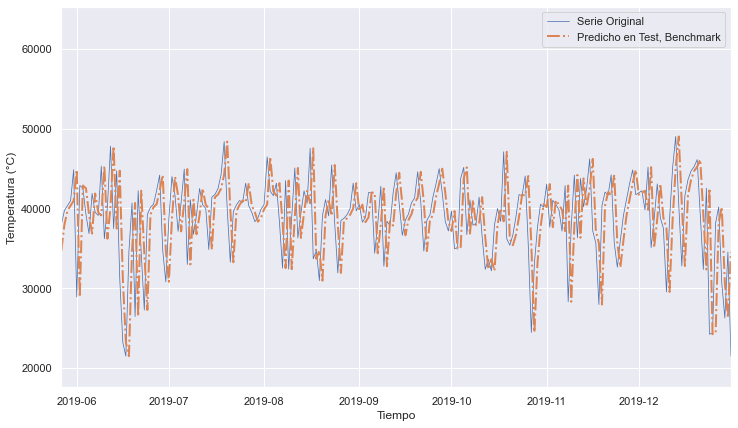

In [74]:
plt.figure(figsize=(12,7))
plt.plot(serie.index[:length_total], serie[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(serie.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(serie.index[N_train+look_back], serie.index[length_total-1])
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

In [75]:
y_test_pred_benchmark = y[-1+N_train:y.shape[0]-1]
MSE = mean_squared_error(y_test, y_test_pred_benchmark)
print(np.sqrt(MSE))

5925.024102455524


### Ada boost

In [319]:
ab = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1, random_state=1), n_estimators=100)
ab.get_params()

{'base_estimator__ccp_alpha': 0.0,
 'base_estimator__criterion': 'mse',
 'base_estimator__max_depth': 1,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': 'deprecated',
 'base_estimator__random_state': 1,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeRegressor(max_depth=1, random_state=1),
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 100,
 'random_state': None}

In [320]:
s = cross_val_score(ab,X_train, y_train,cv=btscv,scoring='neg_root_mean_squared_error')
print("RMSE:", -1*s.mean(), " ±", s.std())

RMSE: 5661.280559872866  ± 1845.6088319796133


In [326]:
ab.fit(X_train,y_train)
y_pred = ab.predict(X)
y_train_pred = ab.predict(X_train)
y_test_pred = ab.predict(X_test)

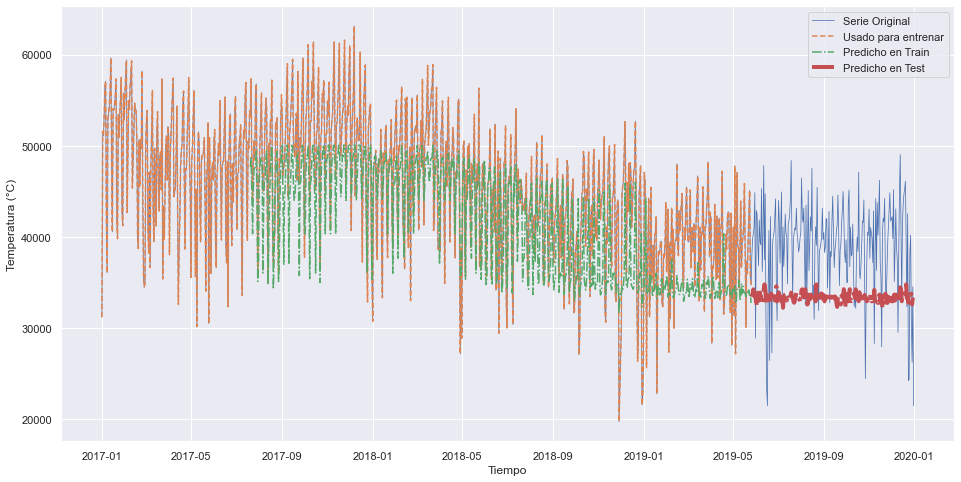

In [327]:
plt.figure(figsize=(16,8))
plt.plot(serie.index[:length_total], serie[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(serie.index[:N_train + look_back], serie[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(serie.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(serie.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

In [329]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 6013.149063869071
Error en Test: 7417.233275382344


Optimizo hiperparámetros utilizando Grid Search

In [360]:
params_ab = {"n_estimators": [50,100,200,500],
          "learning_rate":[0.001,0.01, 0.1, 1.0,1.5],
        "base_estimator__max_depth": [1, 2, 3]}

grid_ab = GridSearchCV(AdaBoostRegressor(base_estimator=DecisionTreeRegressor()), 
                       param_grid=params_ab, cv=btscv, verbose=1, n_jobs=3, scoring='neg_root_mean_squared_error')

In [362]:
grid_ab.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   19.5s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  1.6min
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:  3.1min finished


GridSearchCV(cv=<__main__.BlockingTimeSeriesSplit object at 0x000002C6A87B9F10>,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor()),
             n_jobs=3,
             param_grid={'base_estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.001, 0.01, 0.1, 1.0, 1.5],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [363]:
grid_ab.best_estimator_

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
                  learning_rate=0.1, n_estimators=100)

In [364]:
print("Mejores parametros: "+str(grid_ab.best_params_))
print("Mejor Score: "+str(grid_ab.best_score_)+'\n')

scores = pd.DataFrame(grid_ab.cv_results_)
scores

Mejores parametros: {'base_estimator__max_depth': 2, 'learning_rate': 0.1, 'n_estimators': 100}
Mejor Score: -4788.1543952658485



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.297614,0.025297,0.010050,0.003138,1,0.001,50,"{'base_estimator__max_depth': 1, 'learning_rat...",-4256.523032,-5992.843883,-2982.949831,-8170.363236,-5420.015725,-5364.539141,1741.847335,52
1,0.676521,0.034494,0.023331,0.006011,1,0.001,100,"{'base_estimator__max_depth': 1, 'learning_rat...",-3734.862569,-6015.890058,-2639.957515,-8698.251398,-5494.664533,-5316.725215,2079.547449,50
2,1.314942,0.060794,0.043500,0.011701,1,0.001,200,"{'base_estimator__max_depth': 1, 'learning_rat...",-4096.602453,-5869.224157,-2658.879581,-8294.818606,-5434.812893,-5270.867538,1883.112761,48
3,3.050194,0.138630,0.115033,0.027349,1,0.001,500,"{'base_estimator__max_depth': 1, 'learning_rat...",-3797.863517,-5979.619851,-2534.259923,-8304.813927,-5442.796696,-5211.870783,1968.658384,45
4,0.317115,0.033207,0.009374,0.003821,1,0.01,50,"{'base_estimator__max_depth': 1, 'learning_rat...",-4246.069920,-6033.444455,-2634.688133,-8515.687389,-5438.121008,-5373.602181,1953.726343,53
5,0.676960,0.078296,0.026457,0.003325,1,0.01,100,"{'base_estimator__max_depth': 1, 'learning_rat...",-3409.645304,-5896.860067,-2600.120887,-8701.882078,-5530.843838,-5227.870435,2136.310241,46
6,1.371317,0.034885,0.054187,0.002676,1,0.01,200,"{'base_estimator__max_depth': 1, 'learning_rat...",-3500.647338,-5881.369997,-2556.075768,-8498.834763,-5457.261498,-5178.837873,2063.427003,40
7,3.357605,0.088246,0.106688,0.020358,1,0.01,500,"{'base_estimator__max_depth': 1, 'learning_rat...",-3517.348441,-5797.312894,-2731.200506,-8536.072411,-5422.132772,-5200.813405,2022.957671,43
8,0.320557,0.033566,0.012038,0.003468,1,0.1,50,"{'base_estimator__max_depth': 1, 'learning_rat...",-3859.214515,-5825.607750,-2695.443024,-8578.282900,-5399.124057,-5271.534449,1994.430058,49
9,0.619444,0.020941,0.026406,0.005619,1,0.1,100,"{'base_estimator__max_depth': 1, 'learning_rat...",-3512.037843,-5661.168507,-3040.931615,-8421.951233,-5384.937044,-5204.205249,1904.654928,44


La optmización con grid search arroja que los mejores hiperparámetros fueron:

-learning_rate = 0.1

-n_estimators = 100

-base_estimator_max_depth=2

El modelo con estos hiperparámetros mejora un 15,4% el RMSE obtenido sin la optimización.
    

In [366]:
model_ab = grid_ab.best_estimator_
model_ab.fit(X_train, y_train)
y_train_pred = model_ab.predict(X_train)
y_test_pred = model_ab.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE de los datos de entrenamiento: ", rmse_train, "\nRMSE de los datos de testeo :", rmse_test)

RMSE de los datos de entrenamiento:  4525.016433633434 
RMSE de los datos de testeo : 5014.246761724622


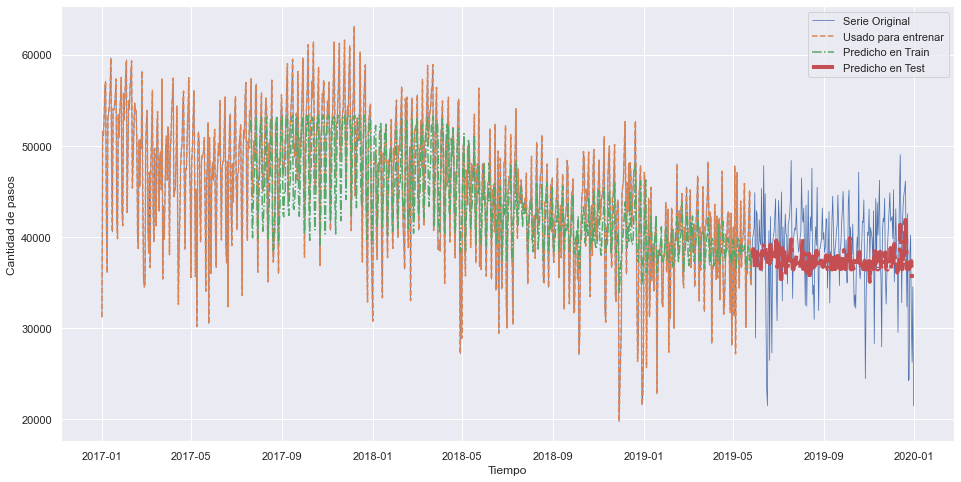

In [367]:
plt.figure(figsize=(16,8))
plt.plot(serie.index[:length_total], serie[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(serie.index[:N_train + look_back], serie[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(serie.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(serie.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

### Gradient Boosting

In [368]:
gb = GradientBoostingRegressor()
# Imprimo los hiperaprámetros por default del modelo:
gb.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [369]:
s = cross_val_score(gb,X_train, y_train,cv=btscv,scoring='neg_root_mean_squared_error')
print("RMSE:", -1*s.mean(), " ±", s.std())

RMSE: 5172.042276762657  ± 2136.9887860665276


In [370]:
gb.fit(X_train,y_train)
y_pred = gb.predict(X)
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

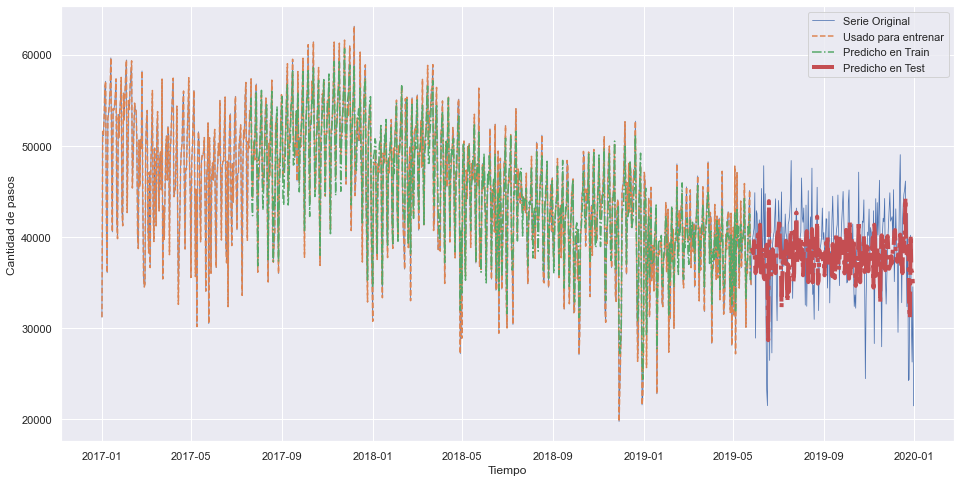

In [371]:
plt.figure(figsize=(16,8))
plt.plot(serie.index[:length_total], serie[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(serie.index[:N_train + look_back], serie[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(serie.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(serie.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

In [372]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 2146.4800394052863
Error en Test: 5008.819998002138


In [373]:
params_gb = {'n_estimators':[50, 100, 250, 500] , 
             'learning_rate':[0.001,0.01, 0.1, 1.0,1.5],
            'max_depth' : [1, 2, 3]}

grid_gb = GridSearchCV(gb, param_grid=params_gb, cv=btscv, verbose=1, n_jobs=3,scoring='neg_root_mean_squared_error')

In [374]:
grid_gb.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   17.8s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  1.7min
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:  2.4min finished


GridSearchCV(cv=<__main__.BlockingTimeSeriesSplit object at 0x000002C6A87B9F10>,
             estimator=GradientBoostingRegressor(), n_jobs=3,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0, 1.5],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [50, 100, 250, 500]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [375]:
grid_gb.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_depth=1, n_estimators=500)

In [376]:
print("Mejores parametros: "+str(grid_gb.best_params_))
print("Mejor Score: "+str(grid_gb.best_score_)+'\n')

scores = pd.DataFrame(grid_gb.cv_results_)
scores

Mejores parametros: {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
Mejor Score: -4937.060083064405



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.232971,0.007869,0.000647,0.000534,0.001,1,50,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",-5662.877821,-6764.149855,-4288.489008,-9186.408532,-5322.466081,-6244.878260,1669.686855,36
1,0.451741,0.026646,0.000200,0.000399,0.001,1,100,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",-5542.985730,-6686.908638,-4162.776967,-9121.409360,-5323.895162,-6167.595171,1680.236140,33
2,1.025680,0.052979,0.001940,0.001408,0.001,1,250,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",-5185.877555,-6476.711193,-3853.382046,-8980.418606,-5318.146749,-5962.907230,1722.727901,30
3,2.144801,0.060496,0.001862,0.002848,0.001,1,500,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",-4709.180887,-6231.354993,-3427.820115,-8822.814979,-5315.001832,-5701.234561,1807.044628,26
4,0.394334,0.014129,0.000200,0.000400,0.001,2,50,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",-5575.430946,-6753.628718,-4255.134681,-9149.385622,-5310.306750,-6208.777343,1671.474606,35
5,0.681664,0.032481,0.000000,0.000000,0.001,2,100,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",-5402.761944,-6680.734422,-4090.668118,-9054.326474,-5310.623050,-6107.822802,1685.921878,32
6,1.742067,0.034479,0.003124,0.006249,0.001,2,250,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",-4904.507045,-6477.573990,-3707.330117,-8819.444908,-5302.845823,-5842.340377,1731.792579,29
7,3.540653,0.078589,0.003124,0.006249,0.001,2,500,"{'learning_rate': 0.001, 'max_depth': 2, 'n_es...",-4292.864504,-6247.924754,-3207.250046,-8505.427340,-5280.469971,-5506.787323,1808.525725,22
8,0.483534,0.037181,0.000000,0.000000,0.001,3,50,"{'learning_rate': 0.001, 'max_depth': 3, 'n_es...",-5572.020829,-6735.745508,-4220.965965,-9169.724887,-5296.328447,-6198.957127,1687.236767,34
9,1.009845,0.035093,0.000000,0.000000,0.001,3,100,"{'learning_rate': 0.001, 'max_depth': 3, 'n_es...",-5367.626574,-6658.924711,-4053.133485,-9092.200743,-5286.015398,-6091.580182,1711.952800,31



La optmización con grid search arroja que los mejores hiperparámetros fueron:

-learning_rate = 0.01

-n_estimators = 500

-max_depth=1

El modelo con estos hiperparámetros mejora un 4,5% el RMSE obtenido sin la optimización. Sin embargo, el RMSE obtenido con este modelo no mejoró los resultados obtenidos con el modelo Ada Boost.


In [379]:
model_gb = grid_gb.best_estimator_
model_gb.fit(X_train, y_train)
y_train_pred = model_gb.predict(X_train)
y_held_pred = model_gb.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE de los datos de entrenamiento: ", rmse_train, "\nRMSE de los datos de testeo :", rmse_test)

RMSE de los datos de entrenamiento:  4288.742268977893 
RMSE de los datos de testeo : 5008.819998002138


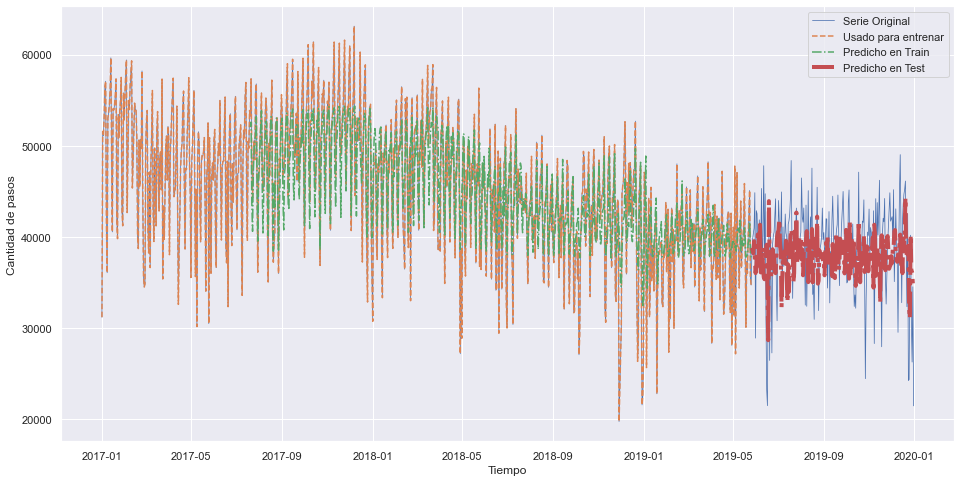

In [380]:
plt.figure(figsize=(16,8))
plt.plot(serie.index[:length_total], serie[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(serie.index[:N_train + look_back], serie[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(serie.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(serie.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

### Modelo Random Forest

In [77]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = 3)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 3,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [78]:
s = cross_val_score(rf,X_train, y_train,cv=btscv,scoring='neg_root_mean_squared_error')
print("RMSE:", -1*s.mean(), " ±", s.std())

RMSE: 4823.929416909307  ± 2058.3070993267006


In [79]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print(y_train_pred.shape)
print(y_test_pred.shape)
print(y_pred.shape)


(676,)
(218,)
(894,)


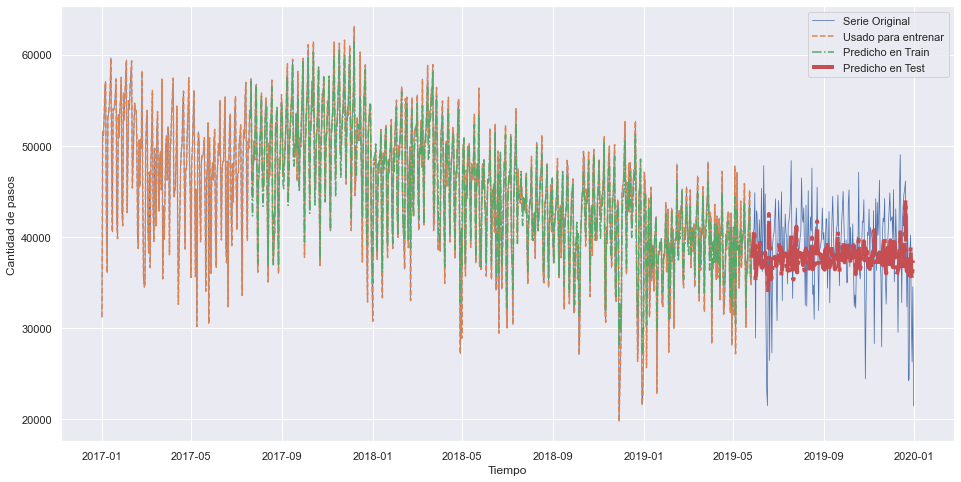

In [81]:
plt.figure(figsize=(16,8))
plt.plot(serie.index[:length_total], serie[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(serie.index[:N_train + look_back], serie[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(serie.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(serie.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

In [310]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 1752.506013577161
Error en Test: 4701.146557840323


#### Random Search y Grid Search

Para optimizar los hiperparámetros, primero voy a realizar una búsqueda con rndom search, y luego voy a utilizar grid search para intentar seguir mejorando los resultados del modelo.

In [341]:
param_trees = {'n_estimators': sp.stats.randint(1, 500),
               'min_samples_leaf': sp.stats.randint(1, 20),
               'min_samples_split':sp.stats.randint(1, 5) }

In [342]:
random_search_rf = RandomizedSearchCV(rf, param_distributions=param_trees, cv=btscv, verbose=1, n_iter=100, n_jobs=3, scoring='neg_root_mean_squared_error')

In [344]:
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   23.5s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  1.3min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  3.0min
[Parallel(n_jobs=3)]: Done 500 out of 500 | elapsed:  3.4min finished


RandomizedSearchCV(cv=<__main__.BlockingTimeSeriesSplit object at 0x000002C6A87B9F10>,
                   estimator=RandomForestRegressor(n_jobs=3, random_state=42),
                   n_iter=100, n_jobs=3,
                   param_distributions={'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C6A18D1130>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C686755BB0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C68C58BDF0>},
                   scoring='neg_root_mean_squared_error', verbose=1)

In [345]:
random_search_rf.best_estimator_

RandomForestRegressor(min_samples_leaf=8, min_samples_split=3, n_estimators=484,
                      n_jobs=3, random_state=42)

In [346]:
print("Mejores parametros: "+str(random_search_rf.best_params_))
print("Mejor Score: "+str(random_search_rf.best_score_)+'\n')

scores = pd.DataFrame(random_search_rf.cv_results_)
scores

Mejores parametros: {'min_samples_leaf': 8, 'min_samples_split': 3, 'n_estimators': 484}
Mejor Score: -4736.474285534593



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.438361,0.008970,0.028264,0.001660,3,3,62,"{'min_samples_leaf': 3, 'min_samples_split': 3...",-2633.756502,-5859.925436,-2376.379307,-7883.824896,-5431.370580,-4837.051344,2078.063082,62
1,2.281416,0.114476,0.144974,0.014906,4,4,377,"{'min_samples_leaf': 4, 'min_samples_split': 4...",-2455.672640,-5570.149950,-2306.599660,-8009.343018,-5471.336529,-4762.620359,2147.074108,22
2,0.470327,0.028941,0.000000,0.000000,13,1,303,"{'min_samples_leaf': 13, 'min_samples_split': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,82
3,1.661835,0.052559,0.152372,0.013972,18,3,389,"{'min_samples_leaf': 18, 'min_samples_split': ...",-3131.632105,-5382.071314,-2430.462021,-8225.263203,-5347.801239,-4903.445977,2035.484097,70
4,1.701833,0.079438,0.120555,0.009268,7,2,316,"{'min_samples_leaf': 7, 'min_samples_split': 2...",-2537.546083,-5427.444152,-2289.626436,-8028.130769,-5445.880114,-4745.725511,2127.797928,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.152344,0.097135,0.097654,0.018889,19,4,313,"{'min_samples_leaf': 19, 'min_samples_split': ...",-3267.123826,-5431.903602,-2445.614959,-8239.508077,-5361.767160,-4949.183525,2016.266847,76
96,0.154492,0.009943,0.014257,0.001885,4,4,23,"{'min_samples_leaf': 4, 'min_samples_split': 4...",-2659.080921,-5795.243449,-2280.400670,-7778.917087,-5661.804202,-4835.089266,2075.231169,61
97,1.378859,0.055922,0.137265,0.025126,19,2,367,"{'min_samples_leaf': 19, 'min_samples_split': ...",-3263.575100,-5427.147808,-2422.699179,-8252.136992,-5347.404712,-4942.592758,2025.868372,73
98,3.069920,0.052711,0.165944,0.013359,3,3,474,"{'min_samples_leaf': 3, 'min_samples_split': 3...",-2502.773077,-5595.263980,-2299.173548,-8111.002273,-5449.673046,-4791.577185,2170.174448,51


    
La optmización con random search arroja que los mejores hiperparámetros fueron:

-min_samples_leaf = 8

-min_samples_split = 3

-n_estimators=484

El modelo con estos hiperparámetros mejora un 1,8% el RMSE obtenido sin la optimización. Además, este resultado supera a los obtenidos en los dos modelos anteriores.

Ahora se realizará un optimización usando grid search para mejorar aún más este resultado.

In [350]:
# Uso el mejor modelo para predecir test
model_rf = random_search_rf.best_estimator_
model_rf.fit(X_train, y_train)
y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE de los datos de entrenamiento: ", rmse_train, "\nRMSE de los datos de testeo :", rmse_test)

RMSE de los datos de entrenamiento:  2988.5214590516207 
RMSE de los datos de testeo : 4722.735687775691


In [351]:
# Grid search
param_trees = {'n_estimators': [450,475,480,490,500],
               'min_samples_leaf':[7,8,9,10],
              'min_samples_split':[2,3,4]}

In [352]:
grid_search_rf = GridSearchCV(rf, param_grid=param_trees, cv=btscv, verbose=1, n_jobs=3, scoring='neg_root_mean_squared_error')

In [353]:
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   41.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  3.0min
[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed:  4.5min finished


GridSearchCV(cv=<__main__.BlockingTimeSeriesSplit object at 0x000002C6A87B9F10>,
             estimator=RandomForestRegressor(n_jobs=3, random_state=42),
             n_jobs=3,
             param_grid={'min_samples_leaf': [7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [450, 475, 480, 490, 500]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [354]:
grid_search_rf.best_estimator_

RandomForestRegressor(min_samples_leaf=8, n_estimators=450, n_jobs=3,
                      random_state=42)

In [355]:
print("Mejores parametros: "+str(grid_search_rf.best_params_))
print("Mejor Score: "+str(grid_search_rf.best_score_)+'\n')

scores = pd.DataFrame(grid_search_rf.cv_results_)
scores

Mejores parametros: {'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 450}
Mejor Score: -4733.888198052248



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.266709,0.060142,0.158599,0.015018,7,2,450,"{'min_samples_leaf': 7, 'min_samples_split': 2...",-2527.377837,-5450.490382,-2273.084322,-8023.441202,-5413.190762,-4737.516901,2131.680439,10
1,2.468234,0.131136,0.187597,0.023833,7,2,475,"{'min_samples_leaf': 7, 'min_samples_split': 2...",-2534.615642,-5451.467587,-2286.716346,-8036.873194,-5417.024423,-4745.339438,2131.483022,46
2,2.458333,0.124039,0.194424,0.013137,7,2,480,"{'min_samples_leaf': 7, 'min_samples_split': 2...",-2535.475885,-5450.292266,-2285.942899,-8036.834789,-5419.182664,-4745.545700,2131.529633,49
3,2.667546,0.145958,0.189182,0.014812,7,2,490,"{'min_samples_leaf': 7, 'min_samples_split': 2...",-2534.140041,-5448.901334,-2286.692436,-8050.554399,-5414.678958,-4746.993434,2135.499700,55
4,2.782856,0.081555,0.199404,0.019466,7,2,500,"{'min_samples_leaf': 7, 'min_samples_split': 2...",-2534.637841,-5446.925325,-2289.199307,-8061.910476,-5414.972030,-4749.528996,2138.224130,60
5,2.456690,0.121575,0.182795,0.023771,7,3,450,"{'min_samples_leaf': 7, 'min_samples_split': 3...",-2527.377837,-5450.490382,-2273.084322,-8023.441202,-5413.190762,-4737.516901,2131.680439,10
6,2.598472,0.099735,0.181609,0.008043,7,3,475,"{'min_samples_leaf': 7, 'min_samples_split': 3...",-2534.615642,-5451.467587,-2286.716346,-8036.873194,-5417.024423,-4745.339438,2131.483022,46
7,2.623502,0.053818,0.179905,0.006986,7,3,480,"{'min_samples_leaf': 7, 'min_samples_split': 3...",-2535.475885,-5450.292266,-2285.942899,-8036.834789,-5419.182664,-4745.545700,2131.529633,49
8,2.689526,0.081465,0.186991,0.033549,7,3,490,"{'min_samples_leaf': 7, 'min_samples_split': 3...",-2534.140041,-5448.901334,-2286.692436,-8050.554399,-5414.678958,-4746.993434,2135.499700,56
9,2.722871,0.079110,0.187781,0.013128,7,3,500,"{'min_samples_leaf': 7, 'min_samples_split': 3...",-2534.637841,-5446.925325,-2289.199307,-8061.910476,-5414.972030,-4749.528996,2138.224130,58


La optmización con grid search arroja que los mejores hiperparámetros fueron:

-min_samples_leaf = 8

-min_samples_split = 2

-n_estimators= 450

La optimización con grid search mejoró levemente el RMSE obtenido (solamente un 0,06%).

In [104]:
# model_rf = grid_search_rf.best_estimator_
model_rf = RandomForestRegressor(min_samples_leaf=8, n_estimators=450, n_jobs=3,random_state=42)
model_rf.fit(X_train, y_train)
y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("RMSE de los datos de entrenamiento: ", rmse_train, "\nRMSE de los datos de testeo :", rmse_test)

RMSE de los datos de entrenamiento:  2988.166319713553 
RMSE de los datos de testeo : 4723.884924998302


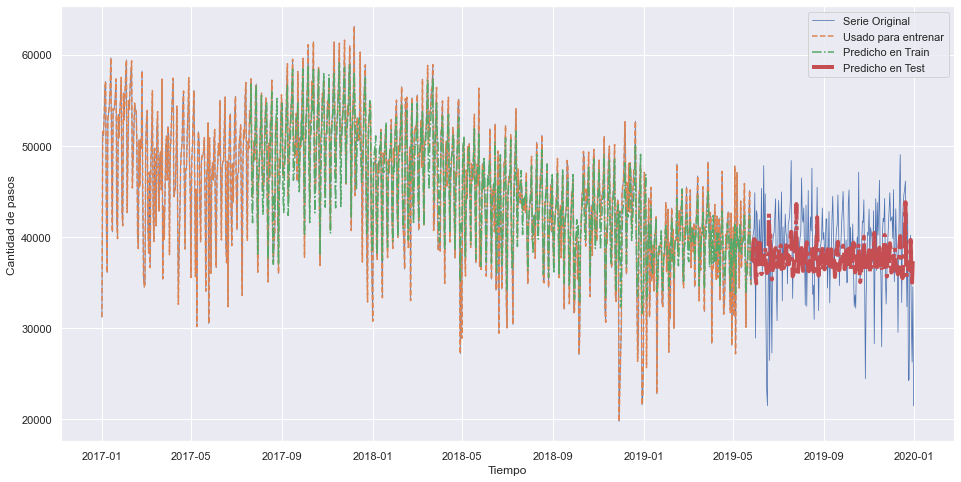

In [105]:
plt.figure(figsize=(16,8))
plt.plot(serie.index[:length_total], serie[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(serie.index[:N_train + look_back], serie[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(serie.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(serie.index[N_train+look_back: length_total-1], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

#### Predicciones para 2020

In [109]:
# Predigo valores de 2020
y_ms_pred = []
x = X[X.shape[0]-1,:] # arrancamos con la ultima instancias del conjunto X
for i in range(366):
    y_os_pred = model_rf.predict(x.reshape(1,-1))
    y_ms_pred.append(y_os_pred)
    x = np.append(x[1:], y_os_pred)
y_ms_pred = np.array(y_ms_pred)

In [110]:
dates_2020 = pd.date_range(start='2020/01/01', end='2020/12/31', freq='D')
dates_2020

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

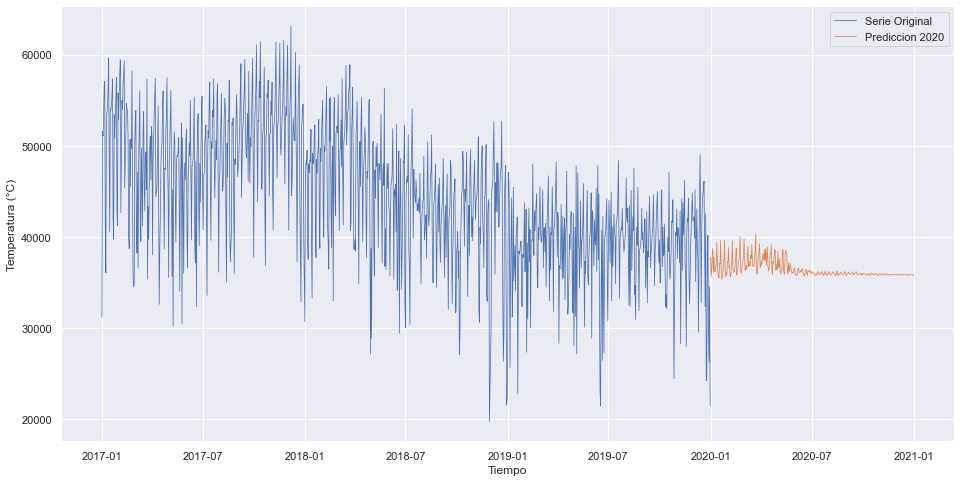

In [111]:
plt.figure(figsize=(16,8))
plt.plot(serie.index[:length_total], serie[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(dates_2020, y_ms_pred,lw = 0.75, label = 'Prediccion 2020')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.show()

#### Importancia de las features

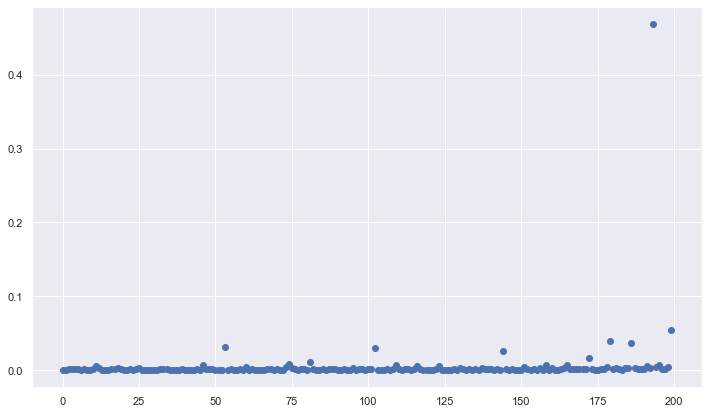

In [112]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(model_rf.feature_importances_.size),model_rf.feature_importances_)
plt.xlabel("Lags")
plt.ylabel("Importancia")
plt.show()

En el gráfico anterior se puede ver la importancia de los features para el modelo random forest. Se observan muchos puntos con una importancia relativamente baja, y la mayor importancia para predecir se da para un lag de aproximadamente 190 días.

### Conclusiones

El mejor modelo de los entrenados fue el random forest con los siguientes hiperparámetros:

-min_samples_leaf = 8

-min_samples_split = 2

-n_estimators= 450

Este modelo obtuvo mejor RMSE que XG Boost y Ada Boost.

Creo que estos modelos podrían mejorarse con los datos que tenemos. Una posibilidad sería realizar un one hot encoding de algunas variables categóricas del dataset (por ejemplo días de la semana, tipo de vehículo, formas de pago). Considero que hay información importante, principalmente en los días de la semana, que no fue usada para el desarrollo del modelo. En el EDA se vio claramente como el fin de semana afecta la circulación de autos, por lo tanto considero que incorporar esta información al modelo podría mejorar los resultados obtenidos.

En cuanto al comportamiento de las estaciones, en el EDA pudimos ver que las estaciones más importantes (Avellaneda e Illia) tienen un comportamiento muy similar

En cuanto a los próximos pasos con este proyecto, me gustaría probar la librería Prophet, para comparar con los modelos implementados y comprobar sim ejoran los resultados o no. También me gustaría incorporar los días de semana al modelo, porque lo considero información valiosa que podría mejorar los resultados obtenidos. Finalmente, también me gustaría imcorporar redes neuronales para ver si mejoran los resultados respecto a los modelos de machine learning.